In [1]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.4 MB/s eta 0:00:00


Predicted Trend Value: 50.00


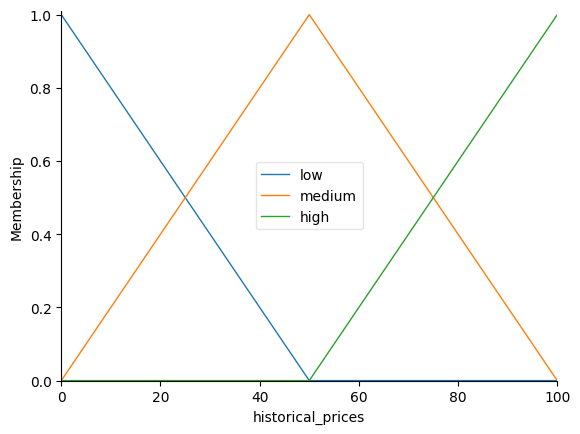

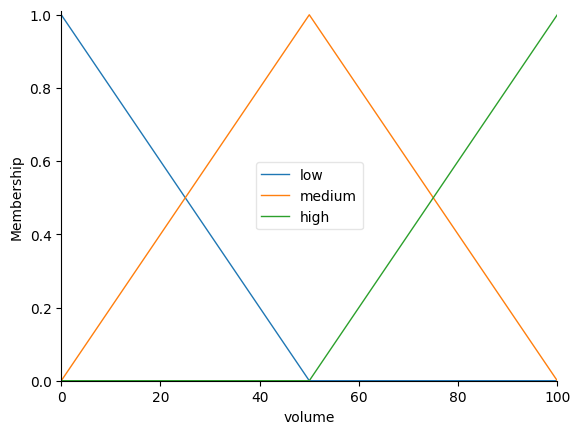

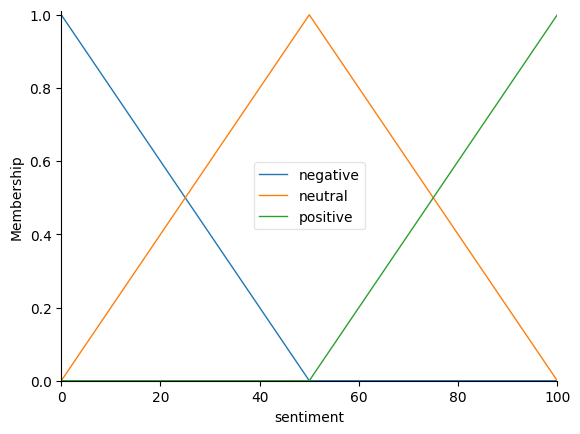

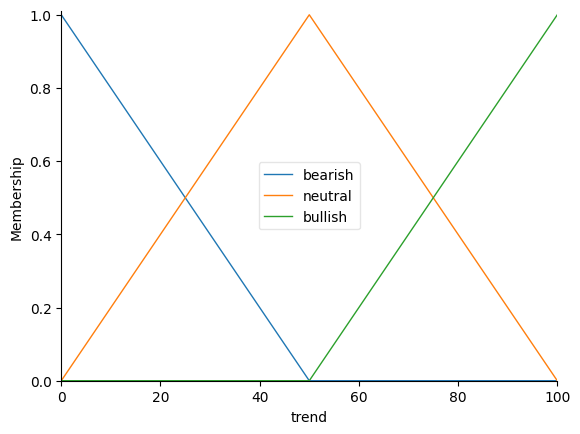

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the fuzzy variables
# Input variables
historical_prices = ctrl.Antecedent(np.arange(0, 101, 1), 'historical_prices')
volume = ctrl.Antecedent(np.arange(0, 101, 1), 'volume')
sentiment = ctrl.Antecedent(np.arange(0, 101, 1), 'sentiment')

# Output variable
trend = ctrl.Consequent(np.arange(0, 101, 1), 'trend')

# Define fuzzy sets for input variables
historical_prices['low'] = fuzz.trimf(historical_prices.universe, [0, 0, 50])
historical_prices['medium'] = fuzz.trimf(historical_prices.universe, [0, 50, 100])
historical_prices['high'] = fuzz.trimf(historical_prices.universe, [50, 100, 100])

volume['low'] = fuzz.trimf(volume.universe, [0, 0, 50])
volume['medium'] = fuzz.trimf(volume.universe, [0, 50, 100])
volume['high'] = fuzz.trimf(volume.universe, [50, 100, 100])

sentiment['negative'] = fuzz.trimf(sentiment.universe, [0, 0, 50])
sentiment['neutral'] = fuzz.trimf(sentiment.universe, [0, 50, 100])
sentiment['positive'] = fuzz.trimf(sentiment.universe, [50, 100, 100])

# Define fuzzy sets for the output variable
trend['bearish'] = fuzz.trimf(trend.universe, [0, 0, 50])
trend['neutral'] = fuzz.trimf(trend.universe, [0, 50, 100])
trend['bullish'] = fuzz.trimf(trend.universe, [50, 100, 100])

# Define the fuzzy rules
rule1 = ctrl.Rule(historical_prices['high'] & volume['low'], trend['bearish'])
rule2 = ctrl.Rule(historical_prices['medium'] & sentiment['positive'], trend['bullish'])
rule3 = ctrl.Rule(volume['high'] & sentiment['neutral'], trend['neutral'])

# Create the control system and simulation
trend_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
trend_sim = ctrl.ControlSystemSimulation(trend_ctrl)

# Simulate with some example data
trend_sim.input['historical_prices'] = 100
trend_sim.input['volume'] = 90
trend_sim.input['sentiment'] = 90

# Compute the result
trend_sim.compute()
print(f"Predicted Trend Value: {trend_sim.output['trend']:.2f}")

# Plot fuzzy membership functions
historical_prices.view()
volume.view()
sentiment.view()
trend.view()

plt.show()
